In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
fact_table = pd.read_excel("case-study-data.xlsx", sheet_name = "Fact_table", engine='openpyxl')
trans_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Trans_dim", engine='openpyxl')
item_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Item_dim", engine='openpyxl')
customer_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Customer_dim", engine='openpyxl')
time_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Time_dim", engine='openpyxl')
store_dim =  pd.read_excel("case-study-data.xlsx", sheet_name = "Store_dim", engine='openpyxl')

print("data has been loaded successfully!!")

data has been loaded successfully!!


In [3]:
fact_trans = pd.merge(fact_table, trans_dim,on= 'payment_key')
fact_trans_item = pd.merge(fact_trans, item_dim, on='item_key')
fact_trans_item_cust = pd.merge(fact_trans_item, customer_dim, on= 'customer_key')
fact_trans_item_cust_time = pd.merge(fact_trans_item_cust, time_dim, on= 'time_key')
fact_trans_item_cust_time_store = pd.merge(fact_trans_item_cust_time, store_dim, on= 'store_key')

In [4]:
fact_trans_item_cust_time_store.head(5)

,payment_key,customer_key,time_key,item_key,store_key,quantity_sold,unit_x,unit_price_x,total_price,trans_type,...,week,month,quarter,year,store_size,location,city,upazila_y,district_y,division_y
0,P025,C005440,T01562,I00264,S0035,1,Ct,15.0,15.0,card,...,2nd Week,7,Q3,2016,large,"Boira, Dhaka road",Khulna,Boira,Khulna,Khulna
1,P002,C002862,T02119,I00264,S0008,7,Ct,15.0,105.0,card,...,3rd Week,2,Q1,2016,medium,9 A road,Sunamganj,Jamalganj,Sunamganj,Sylhet
2,P001,C000360,T04322,I00091,S0024,4,bottles,7.5,30.0,cash,...,2nd Week,1,Q1,2020,large,"H-607,R-10 Baitul Aman Housing Society, Rajshahi",Rajshahi,Rajshahi,Rajshahi,Rajshahi
3,P013,C001636,T02225,I00174,S0037,11,oz,18.0,198.0,card,...,3rd Week,6,Q2,2019,small,Hill town,Rangamati,Baghaichari,Rangamati,Chittagong
4,P039,C000641,T04425,I00241,S0009,6,ct,12.0,72.0,mobile,...,1st Week,1,Q1,2019,small,Infront of Mohonpur jame mosjid,Sunamganj,Tahirpur,Sunamganj,Sylhet


In [5]:
store_data = fact_trans_item_cust_time_store[fact_trans_item_cust_time_store['store_key'] == 'S0020']
store_data.head(4)

,payment_key,customer_key,time_key,item_key,store_key,quantity_sold,unit_x,unit_price_x,total_price,trans_type,...,week,month,quarter,year,store_size,location,city,upazila_y,district_y,division_y
94,P035,C007831,T01394,I00123,S0020,1,ct,45.0,45.0,card,...,4th Week,11,Q4,2015,small,"687, Adabor",Nilphamari,Sayedpur,Nilphamari,Rangpur
207,P001,C001616,T01369,I00069,S0020,8,bottles,17.5,140.0,cash,...,1st Week,6,Q2,2014,small,"687, Adabor",Nilphamari,Sayedpur,Nilphamari,Rangpur
389,P033,C005341,T01549,I00264,S0020,1,Ct,15.0,15.0,card,...,1st Week,1,Q1,2016,small,"687, Adabor",Nilphamari,Sayedpur,Nilphamari,Rangpur
434,P006,C005885,T02838,I00083,S0020,2,bottles,14.0,28.0,card,...,1st Week,11,Q4,2015,small,"687, Adabor",Nilphamari,Sayedpur,Nilphamari,Rangpur


In [6]:
store_data.describe().T


,count,mean,std,min,25%,50%,75%,max
quantity_sold,1801.0,6.069406e+00,3.166871e+00,1.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.100000e+01
unit_price_x,1801.0,1.714797e+01,7.507559e+00,6.000000e+00,1.400000e+01,1.550000e+01,1.800000e+01,5.500000e+01
total_price,1801.0,1.043448e+02,7.555717e+01,6.000000e+00,4.950000e+01,9.000000e+01,1.400000e+02,6.050000e+02
unit_price_y,1801.0,1.714797e+01,7.507559e+00,6.000000e+00,1.400000e+01,1.550000e+01,1.800000e+01,5.500000e+01
stock_quantity,1801.0,2.562621e+02,7.691422e+02,3.000000e+00,2.400000e+01,4.000000e+01,1.760000e+02,5.000000e+03
contact_no,1801.0,8.801759e+12,1.422651e+08,8.801510e+12,8.801638e+12,8.801765e+12,8.801876e+12,8.802000e+12
nid,1801.0,5.543287e+12,2.615897e+12,1.005409e+12,3.260487e+12,5.685459e+12,7.812743e+12,9.996699e+12
hour,1801.0,1.149361e+01,6.924761e+00,0.000000e+00,5.000000e+00,1.100000e+01,1.700000e+01,2.300000e+01
day,1801.0,1.573681e+01,8.701125e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
month,1801.0,6.649639e+00,3.413203e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01


In [7]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1801 entries, 94 to 99849
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   payment_key     1801 non-null   object 
 1   customer_key    1801 non-null   object 
 2   time_key        1801 non-null   object 
 3   item_key        1801 non-null   object 
 4   store_key       1801 non-null   object 
 5   quantity_sold   1801 non-null   int64  
 6   unit_x          1797 non-null   object 
 7   unit_price_x    1801 non-null   float64
 8   total_price     1801 non-null   float64
 9   trans_type      1801 non-null   object 
 10  bank_name       1666 non-null   object 
 11  item_name       1801 non-null   object 
 12  item_type       1801 non-null   object 
 13  unit_price_y    1801 non-null   float64
 14  man_country     1801 non-null   object 
 15  supplier        1801 non-null   object 
 16  stock_quantity  1801 non-null   int64  
 17  unit_y          1797 non-null   obje

In [8]:
store_data.isna().sum()

payment_key         0
customer_key        0
time_key            0
item_key            0
store_key           0
quantity_sold       0
unit_x              4
unit_price_x        0
total_price         0
trans_type          0
bank_name         135
item_name           0
item_type           0
unit_price_y        0
man_country         0
supplier            0
stock_quantity      0
unit_y              4
name                6
contact_no          0
nid                 0
address             0
street             55
upazila_x           0
district_x          0
division_x          0
date                0
hour                0
day                 0
week                0
month               0
quarter             0
year                0
store_size          0
location            0
city                0
upazila_y           0
district_y          0
division_y          0
dtype: int64

In [9]:
mode_street= store_data['street'].mode()[0]
store_data['street'].fillna(mode_street, inplace=True)

In [10]:
mode_name= store_data['name'].mode()[0]
store_data['name'].fillna(mode_name, inplace=True)

In [11]:
mode_bank= store_data['bank_name'].mode()[0]
store_data['bank_name'].fillna(mode_bank, inplace=True)

In [12]:
mode_unit= store_data['unit_x'].mode()[0]
store_data['unit_x'].fillna(mode_bank, inplace=True)

In [13]:
store_data.isna().sum()

payment_key       0
customer_key      0
time_key          0
item_key          0
store_key         0
quantity_sold     0
unit_x            0
unit_price_x      0
total_price       0
trans_type        0
bank_name         0
item_name         0
item_type         0
unit_price_y      0
man_country       0
supplier          0
stock_quantity    0
unit_y            4
name              0
contact_no        0
nid               0
address           0
street            0
upazila_x         0
district_x        0
division_x        0
date              0
hour              0
day               0
week              0
month             0
quarter           0
year              0
store_size        0
location          0
city              0
upazila_y         0
district_y        0
division_y        0
dtype: int64

#### We have cleaned all the null values and will drop the unit_y col.

In [14]:
store_data.head(5)

,payment_key,customer_key,time_key,item_key,store_key,quantity_sold,unit_x,unit_price_x,total_price,trans_type,...,week,month,quarter,year,store_size,location,city,upazila_y,district_y,division_y
94,P035,C007831,T01394,I00123,S0020,1,ct,45.0,45.0,card,...,4th Week,11,Q4,2015,small,"687, Adabor",Nilphamari,Sayedpur,Nilphamari,Rangpur
207,P001,C001616,T01369,I00069,S0020,8,bottles,17.5,140.0,cash,...,1st Week,6,Q2,2014,small,"687, Adabor",Nilphamari,Sayedpur,Nilphamari,Rangpur
389,P033,C005341,T01549,I00264,S0020,1,Ct,15.0,15.0,card,...,1st Week,1,Q1,2016,small,"687, Adabor",Nilphamari,Sayedpur,Nilphamari,Rangpur
434,P006,C005885,T02838,I00083,S0020,2,bottles,14.0,28.0,card,...,1st Week,11,Q4,2015,small,"687, Adabor",Nilphamari,Sayedpur,Nilphamari,Rangpur
568,P013,C008757,T00935,I00075,S0020,10,cans,15.5,155.0,card,...,1st Week,4,Q2,2018,small,"687, Adabor",Nilphamari,Sayedpur,Nilphamari,Rangpur


### Distribution of total_price

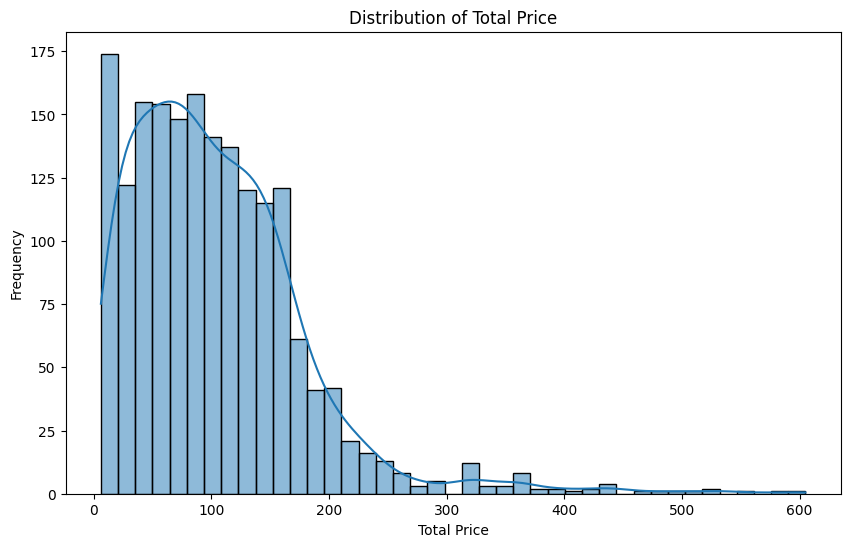

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(store_data['total_price'], kde=True)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()


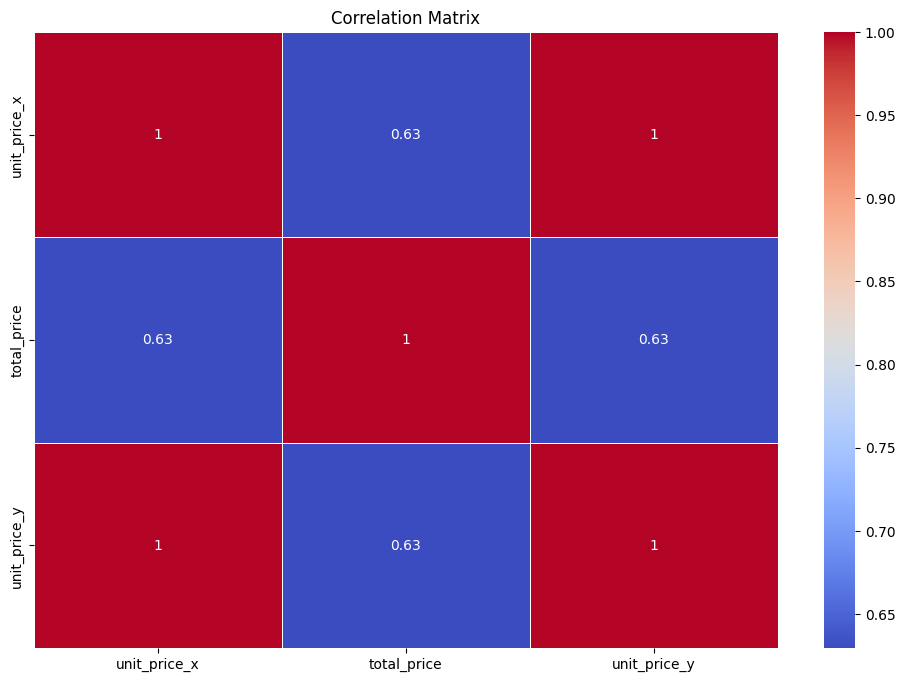

In [16]:
# Correlation matrix
correlation_matrix = store_data.select_dtypes('float64', 'int64').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

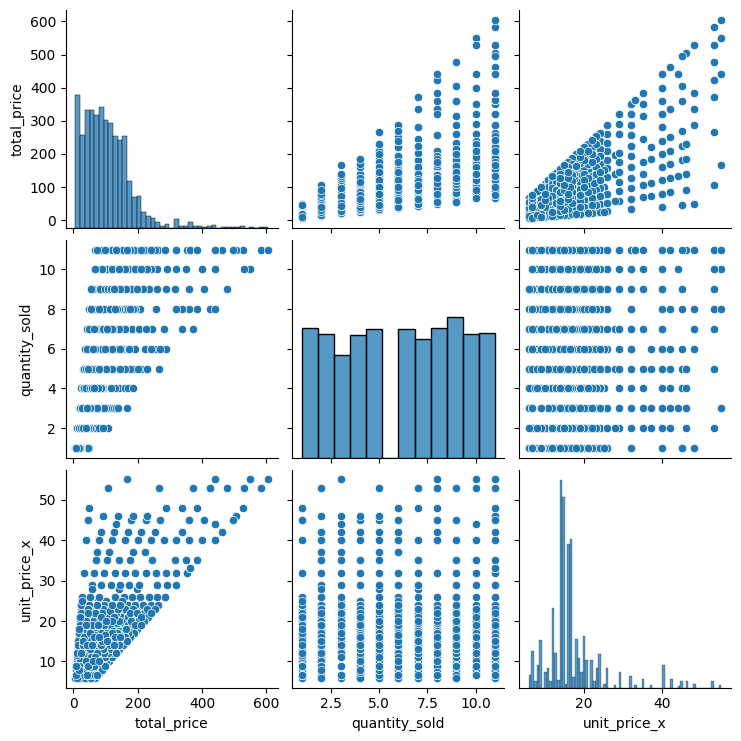

In [17]:
# Pairplot to visualize relationships
sns.pairplot(store_data[['total_price', 'quantity_sold', 'unit_price_x', 'unit_x']])
plt.show()

### Total revenue by division

Dhaka  =  147662.25

Chittagong   =  25299.00

Barishal   =   8231.25

Sylhet   =   6732.50

   division_x  total_price
2       Dhaka    147662.25
1  Chittagong     25299.00
0    Barishal      8231.25
3      Sylhet      6732.50


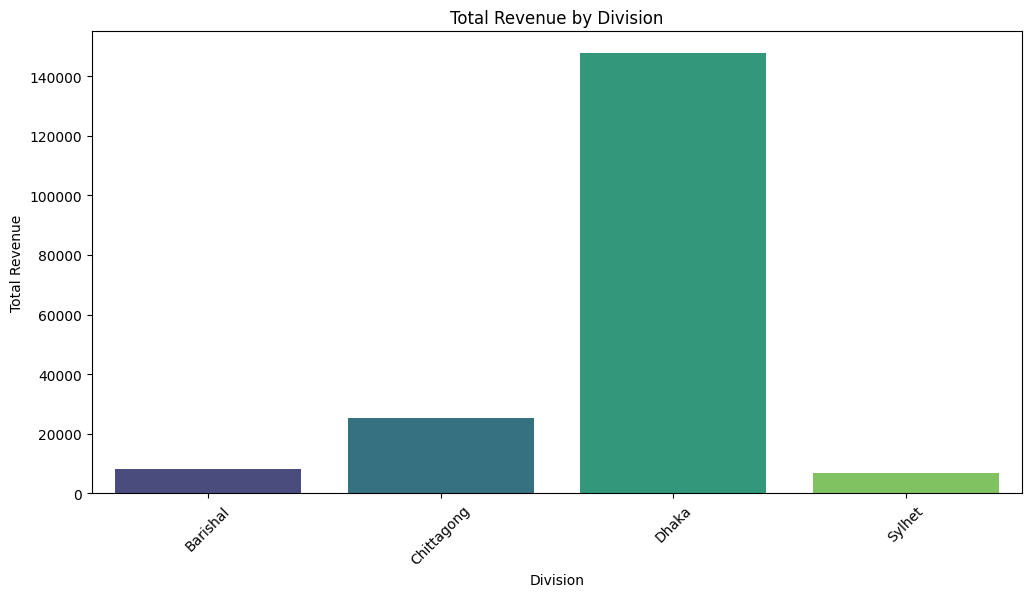

In [18]:
total_revenue_by_division = store_data.groupby('division_x')['total_price'].sum().reset_index()
print(total_revenue_by_division.sort_values(by= 'total_price', ascending= False))
plt.figure(figsize=(12, 6))
sns.barplot(x='division_x', y='total_price', data=total_revenue_by_division, palette='viridis')
plt.title('Total Revenue by Division')
plt.xlabel('Division')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

### Monthly sales trends
month  total_price

1  =   15062.50

2  =   15103.75

3  =   14980.25

4  =   14808.50

5  =   15813.25

6  =   13467.75

7  =   20463.00

8  =   17267.25

9  =   11706.50

10 =    16959.50

11 =    14453.50

12  =   17839.25

    month  total_price
0       1     15062.50
1       2     15103.75
2       3     14980.25
3       4     14808.50
4       5     15813.25
5       6     13467.75
6       7     20463.00
7       8     17267.25
8       9     11706.50
9      10     16959.50
10     11     14453.50
11     12     17839.25


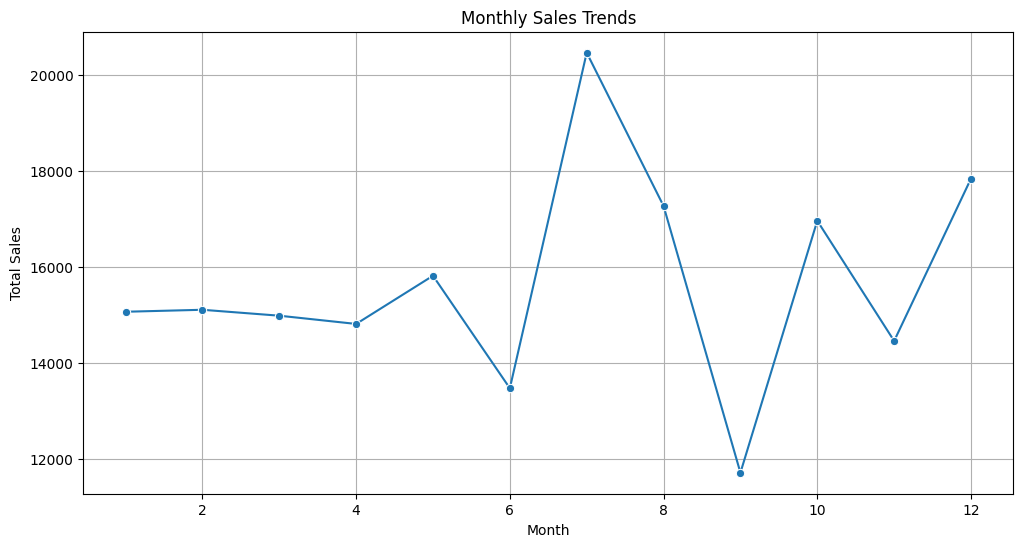

In [19]:
monthly_sales = store_data.groupby('month')['total_price'].sum().reset_index()
print(monthly_sales.sort_values(by= 'month'))
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='total_price', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### Sales Trend Over the Years

   year  total_price
0  2014     27057.25
1  2015     23089.75
2  2016     30397.50
3  2017     30468.00
4  2018     27277.00
5  2019     24947.75
6  2020     23999.75
7  2021       688.00


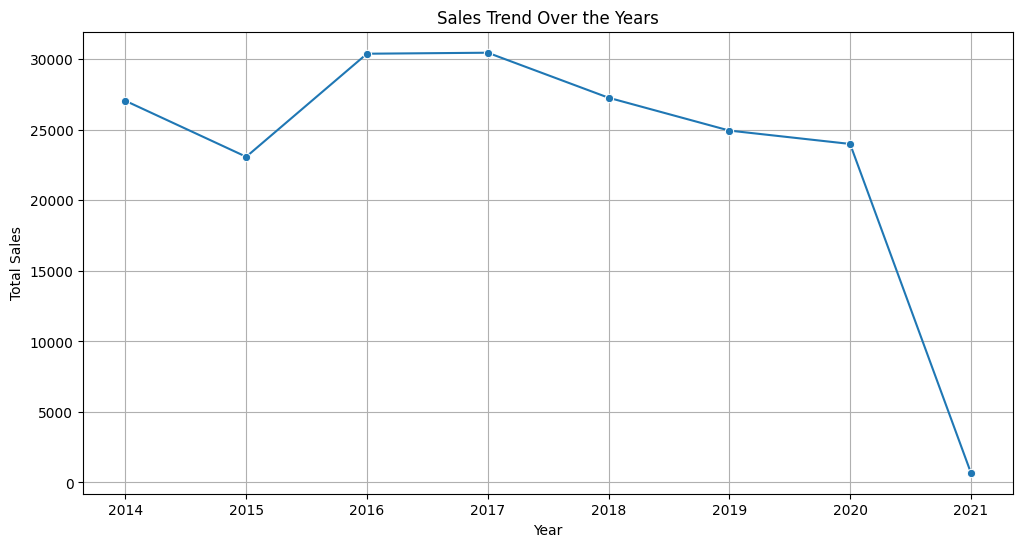

In [20]:
yearly_sales = store_data.groupby('year')['total_price'].sum().reset_index()
print(yearly_sales)
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='total_price', data=yearly_sales, marker='o')
plt.title('Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### Customer distribution by district

  district_x  customer_key
0    B.Baria            56
1   Barishal            76
2    Chadpur            82
3    Comilla            98
4      Dhaka          1342
5    Gazipur            82
6     Sylhet            65


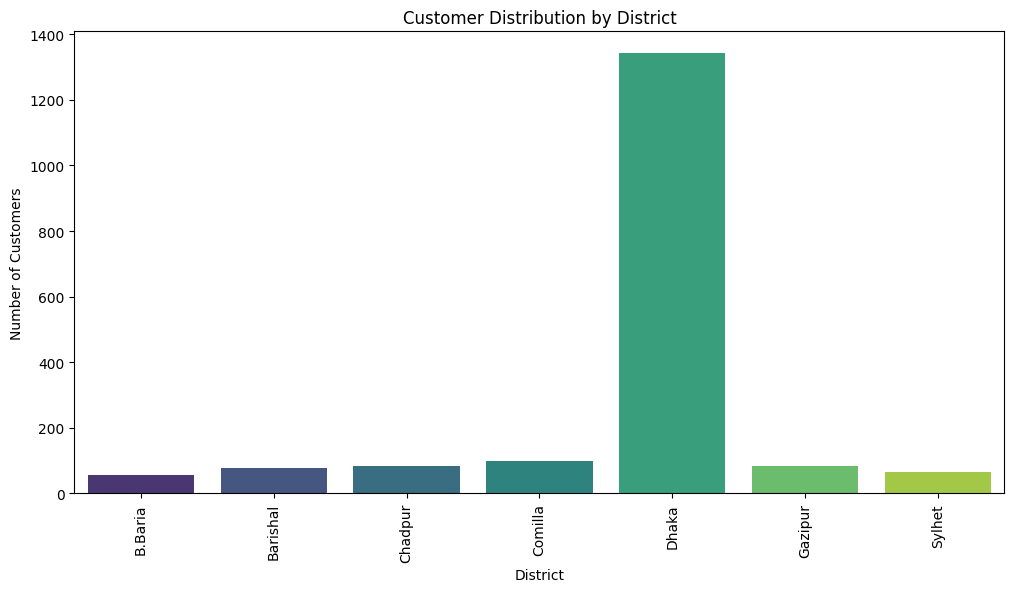

In [21]:
customer_distribution = store_data.groupby('district_x')['customer_key'].count().reset_index()
print(customer_distribution)
plt.figure(figsize=(12, 6))
sns.barplot(x='district_x', y='customer_key', data=customer_distribution, palette='viridis')
plt.title('Customer Distribution by District')
plt.xlabel('District')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

### Transaction Method Analysis

Bkash   =  23741.25

Mutual Trust Bank Limited    =  9367.50

BRAC Bank Limited  =    8548.75

                    bank_name  total_price
5                       Bkash     23741.25
18  Mutual Trust Bank Limited      9367.50
1           BRAC Bank Limited      8548.75
34      Standard Bank Limited      7575.25
25           One Bank Limited      7340.00
23      National Bank Limited      6898.25
0             AB Bank Limited      6754.00
11       Eastern Bank Limited      6372.00
10  Dutch-Bangla Bank Limited      6334.00
29        Pubali Bank Limited      5695.50


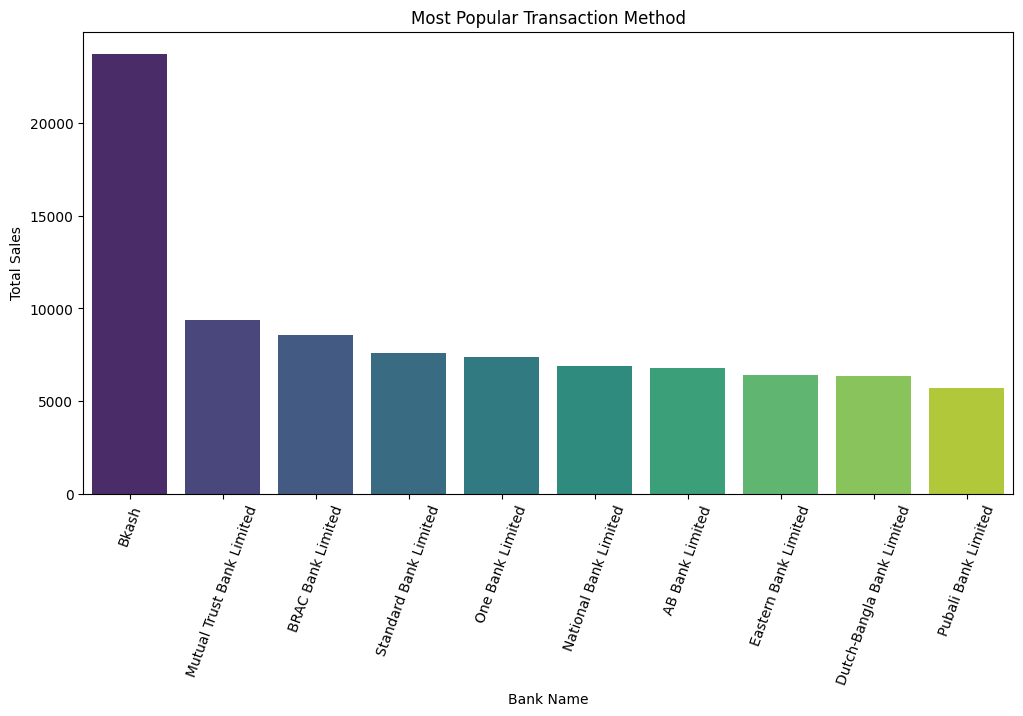

In [22]:
sales_by_bank = store_data.groupby('bank_name')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False).head(10)
print(sales_by_bank)
plt.figure(figsize=(12, 6))
sns.barplot(x='bank_name', y='total_price', data=sales_by_bank, palette='viridis')
plt.title('Most Popular Transaction Method')
plt.xlabel('Bank Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=70)
plt.show()

### Profit analysis based on the item type

                     item_type  total_quantity_sold  total_revenue  \
0   Beverage - Energy/Protein                   419        13979.0   
19            Food - Chocolate                  464         9940.0   
15         Dishware - Cups Hot                  398         9934.0   
9                Coffee K-Cups                  204         9612.0   
20              Food - Healthy                  595         9494.5   
4               Beverage Water                  685         8763.5   
16           Dishware - Plates                  466         8052.5   
26                    Medicine                  531         7729.0   
18                Food - Chips                  474         7725.0   
23               Food - Sweets                  485         7008.0   

    num_transactions  profitability  
0                 35      33.362768  
19                34      21.422414  
15                28      24.959799  
9                 24      47.117647  
20                33      15.957143  
4

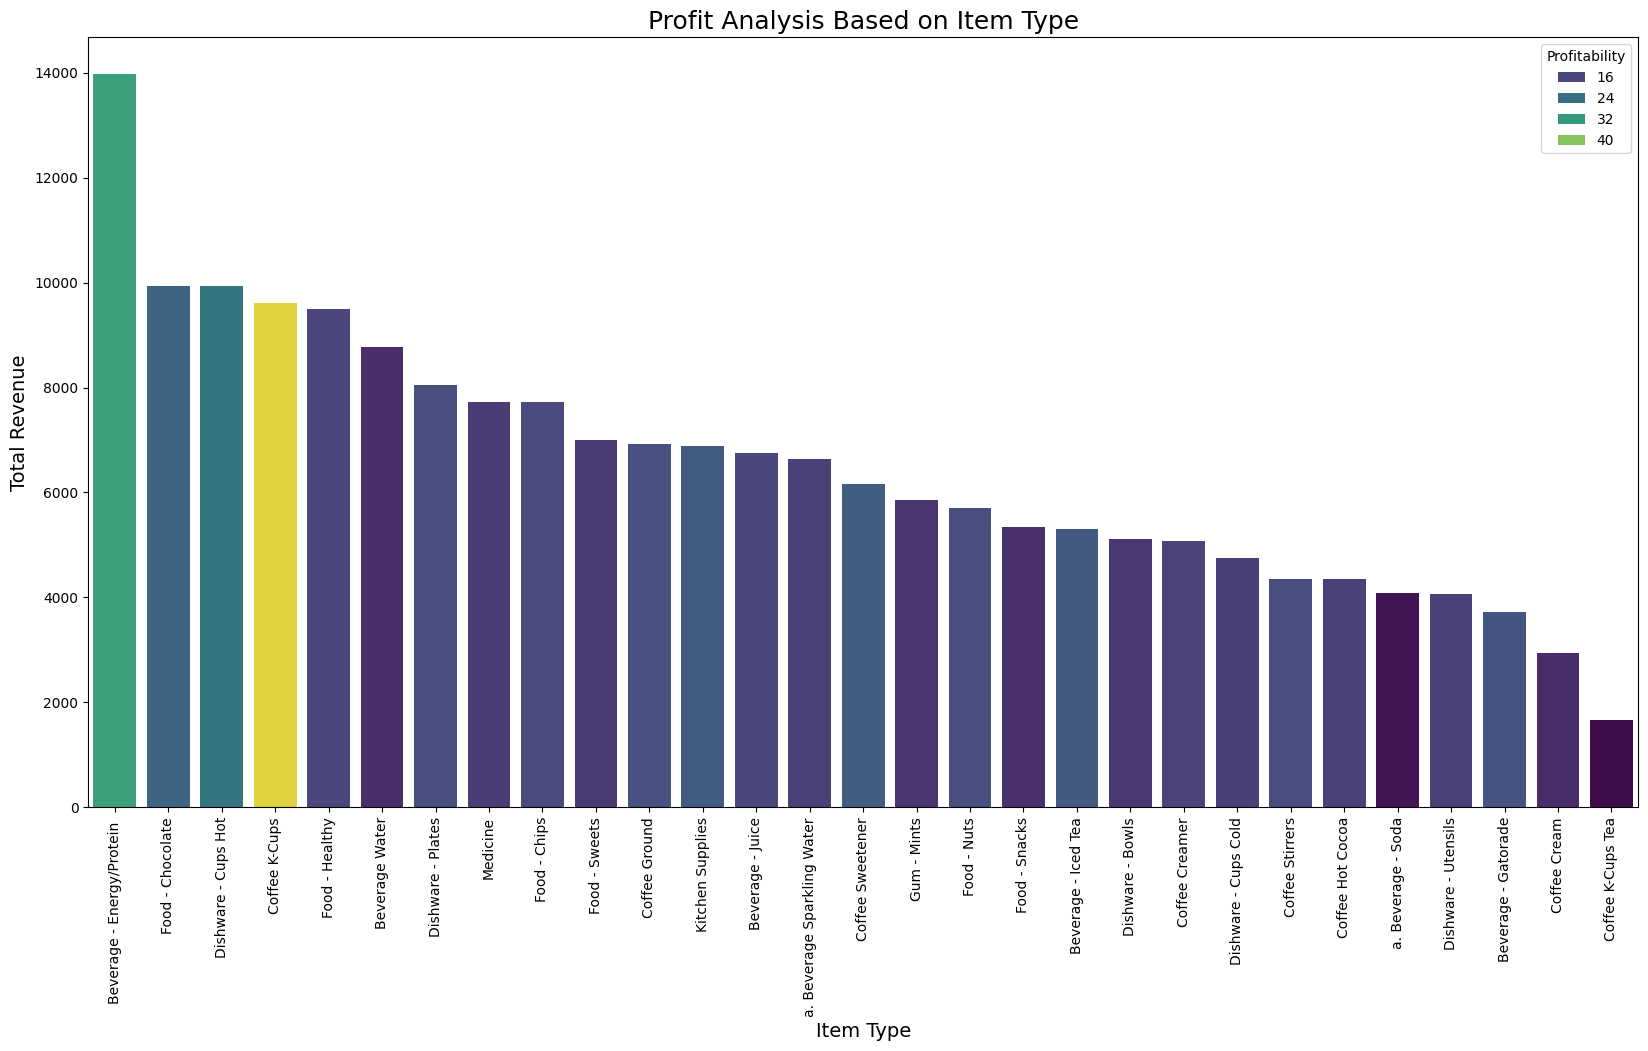

In [23]:
product_performance = store_data.groupby('item_type').agg(
    total_quantity_sold=('quantity_sold', 'sum'),
    total_revenue=('total_price', 'sum'),
    num_transactions=('payment_key', 'nunique')
).reset_index()

product_performance['profitability'] = (
    product_performance['total_revenue'] / product_performance['total_quantity_sold']
)

product_performance = product_performance.sort_values(by='total_revenue', ascending=False)
print(product_performance.head(10))

plt.figure(figsize=(20, 10))
sns.barplot(x='item_type',
            y='total_revenue',
            hue='profitability',
            data=product_performance,
            palette='viridis')

plt.title('Profit Analysis Based on Item Type', fontsize=18)
plt.xlabel('Item Type', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Profitability')
plt.xticks(rotation=90)
plt.show()

### Customer Segment Analysis

In [35]:
customer_segmentation = store_data.groupby('customer_key').agg(
    total_spend=('total_price', 'sum'),
    purchase_frequency=('payment_key', 'nunique'),
    # avg_basket_size=('quantity_sold', 'mean'),
    last_purchase_date=('date', 'max')
).reset_index()

customer_segmentation['segment'] = pd.cut(
    customer_segmentation['total_spend'],
    bins=[0, 100, 500, float('inf')],
    labels=['Regular', 'Medium', 'High-Value']
)

print(customer_segmentation.sort_values(by= 'total_spend', ascending= False))

     customer_key  total_spend  purchase_frequency last_purchase_date  \
1377      C007738       640.00                   2         2017-02-09   
1139      C006492       605.00                   1         2020-06-11   
159       C000959       583.00                   1         2014-04-27   
1192      C006779       550.00                   1         2020-07-15   
902       C005224       540.00                   2         2019-03-24   
...           ...          ...                 ...                ...   
826       C004725         8.00                   1         2016-07-25   
1414      C007977         8.00                   1         2020-05-06   
217       C001339         6.75                   1         2019-01-15   
1529      C008681         6.00                   1         2015-03-11   
150       C000900         6.00                   1         2018-11-25   

         segment  
1377  High-Value  
1139  High-Value  
159   High-Value  
1192  High-Value  
902   High-Value  
...      

### Customer lifetime value prediction

     customer_key  total_spend  purchase_frequency  avg_order_value     clv
1490      C008428        515.0                   3       171.666667  1545.0
1491      C008435        481.0                   3       160.333333  1443.0
1377      C007738        640.0                   2       320.000000  1280.0
1587      C008981        389.0                   3       129.666667  1167.0
902       C005224        540.0                   2       270.000000  1080.0
373       C002185        522.0                   2       261.000000  1044.0
1078      C006159        520.0                   2       260.000000  1040.0
413       C002454        504.0                   2       252.000000  1008.0
1202      C006822        329.0                   3       109.666667   987.0
830       C004742        480.0                   2       240.000000   960.0


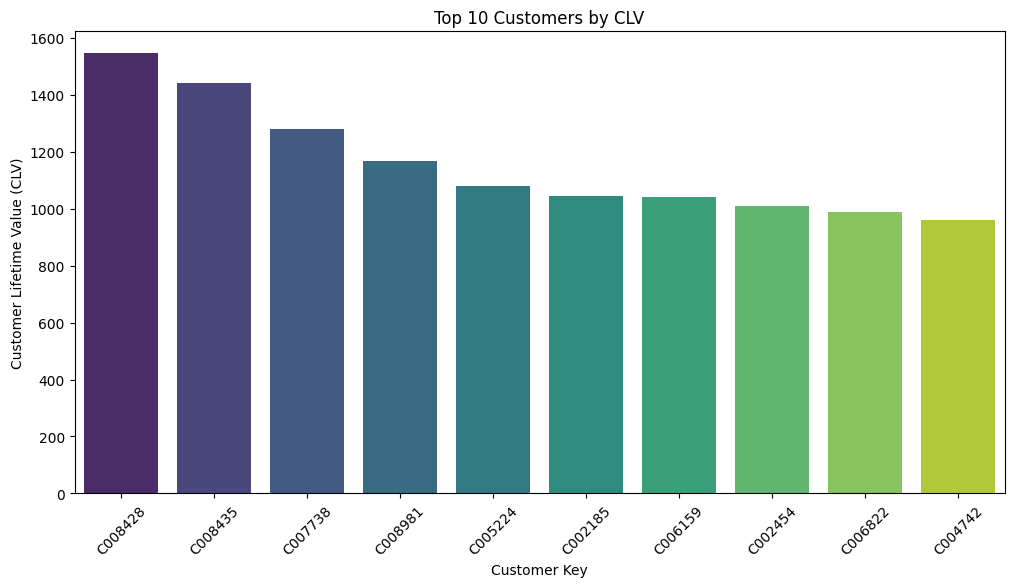

In [25]:
clv_data = store_data.groupby('customer_key').agg(
    total_spend=('total_price', 'sum'),
    purchase_frequency=('payment_key', 'nunique'),
    avg_order_value=('total_price', 'mean'),
).reset_index()

clv_data['clv'] = clv_data['total_spend'] * clv_data['purchase_frequency']
clv_data = clv_data.sort_values(by='clv', ascending=False)
print(clv_data.head(10))

top_10_clv = clv_data.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_key', y='clv', data=top_10_clv, palette='viridis')
plt.title('Top 10 Customers by CLV')
plt.xlabel('Customer Key')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.xticks(rotation=45)
plt.show()

### Linear Reggression

Mean Absolute Error: 14.354436470650079
Mean Squared Error: 808.69751348827
R^2 Score: 88.81946973030972


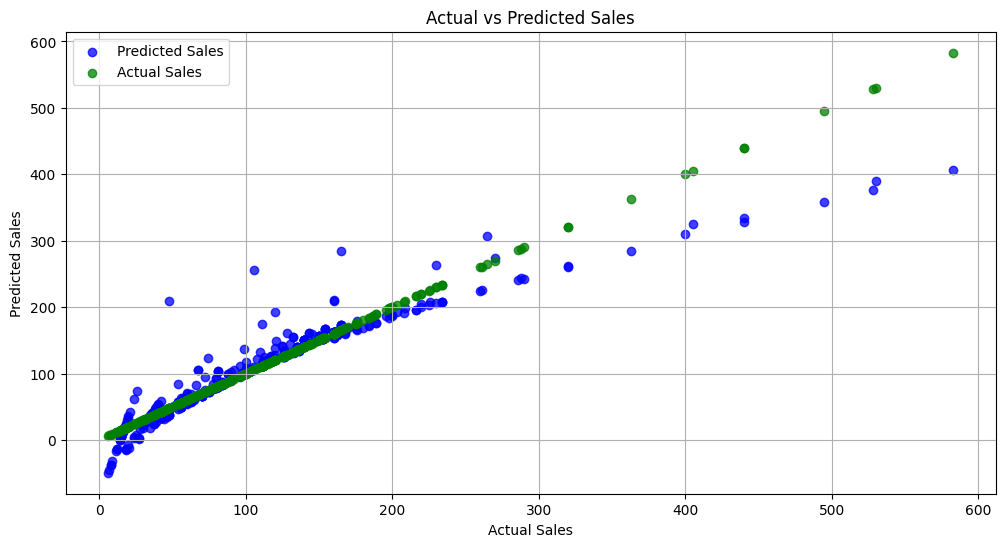

In [26]:
pred_data = store_data[[ 'item_type', 'quantity_sold', 'unit_price_x','quarter']]

X = pred_data
y = store_data['total_price']

# Encode categorical variables
lb_encoders = {}
label_cols = pred_data.select_dtypes('object')

for col in label_cols:
    lb_encoders[col] = LabelEncoder()
    X[col] = lb_encoders[col].fit_transform(X[col])

# Step-2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step-3: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step-4: Make predictions
y_pred = model.predict(X_test)

# Step-5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2 * 100}')

# Step-6: Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.75, color='blue', label='Predicted Sales')
plt.scatter(y_test, y_test, alpha=0.75, color='green', label='Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid()
plt.show()

Assume Store wants to know how much they can generate by selling **Beverage Water** in **Quarter-4**. Let's find out! 

In [27]:
avg_quantity = store_data.groupby(['quarter' ,'item_type', 'quantity_sold'])['total_price'].mean().reset_index()
avg_quantity[avg_quantity['item_type'] == 'Beverage Water']

,quarter,item_type,quantity_sold,total_price
26,Q1,Beverage Water,2,18.000000
27,Q1,Beverage Water,3,33.000000
28,Q1,Beverage Water,4,60.000000
29,Q1,Beverage Water,5,55.000000
30,Q1,Beverage Water,6,120.000000
31,Q1,Beverage Water,7,86.333333
32,Q1,Beverage Water,8,104.000000
33,Q1,Beverage Water,9,105.000000
34,Q1,Beverage Water,10,111.666667
35,Q1,Beverage Water,11,110.000000


In [28]:
# Prediction
# Beverage Water - 4
# avg_quantity_sold - 7, target-10
# avg_unit_price - 14
# Q4- 3

task = [4, 10, 14, 3]
task_prediction = model.predict([task])
print(task_prediction[0])

150.91460749860866


In [29]:
quarter_encoder = lb_encoders['quarter']
quarter_mapping = dict(zip(quarter_encoder.classes_, quarter_encoder.transform(quarter_encoder.classes_)))
print(quarter_mapping)

{'Q1': 0, 'Q2': 1, 'Q3': 2, 'Q4': 3}


In [30]:
item_type_encoder = lb_encoders['item_type']
item_type_mapping = dict(zip(item_type_encoder.classes_, item_type_encoder.transform(item_type_encoder.classes_)))
print(item_type_mapping)

{'Beverage - Energy/Protein ': 0, 'Beverage - Gatorade': 1, 'Beverage - Iced Tea': 2, 'Beverage - Juice': 3, 'Beverage Water': 4, 'Coffee Cream': 5, 'Coffee Creamer': 6, 'Coffee Ground': 7, 'Coffee Hot Cocoa': 8, 'Coffee K-Cups': 9, 'Coffee K-Cups Tea': 10, 'Coffee Stirrers': 11, 'Coffee Sweetener': 12, 'Dishware - Bowls': 13, 'Dishware - Cups Cold': 14, 'Dishware - Cups Hot': 15, 'Dishware - Plates': 16, 'Dishware - Utensils': 17, 'Food - Chips': 18, 'Food - Chocolate': 19, 'Food - Healthy': 20, 'Food - Nuts': 21, 'Food - Snacks': 22, 'Food - Sweets': 23, 'Gum - Mints': 24, 'Kitchen Supplies': 25, 'Medicine': 26, 'a. Beverage - Soda': 27, 'a. Beverage Sparkling Water': 28}


### Sales Trend Forecasting

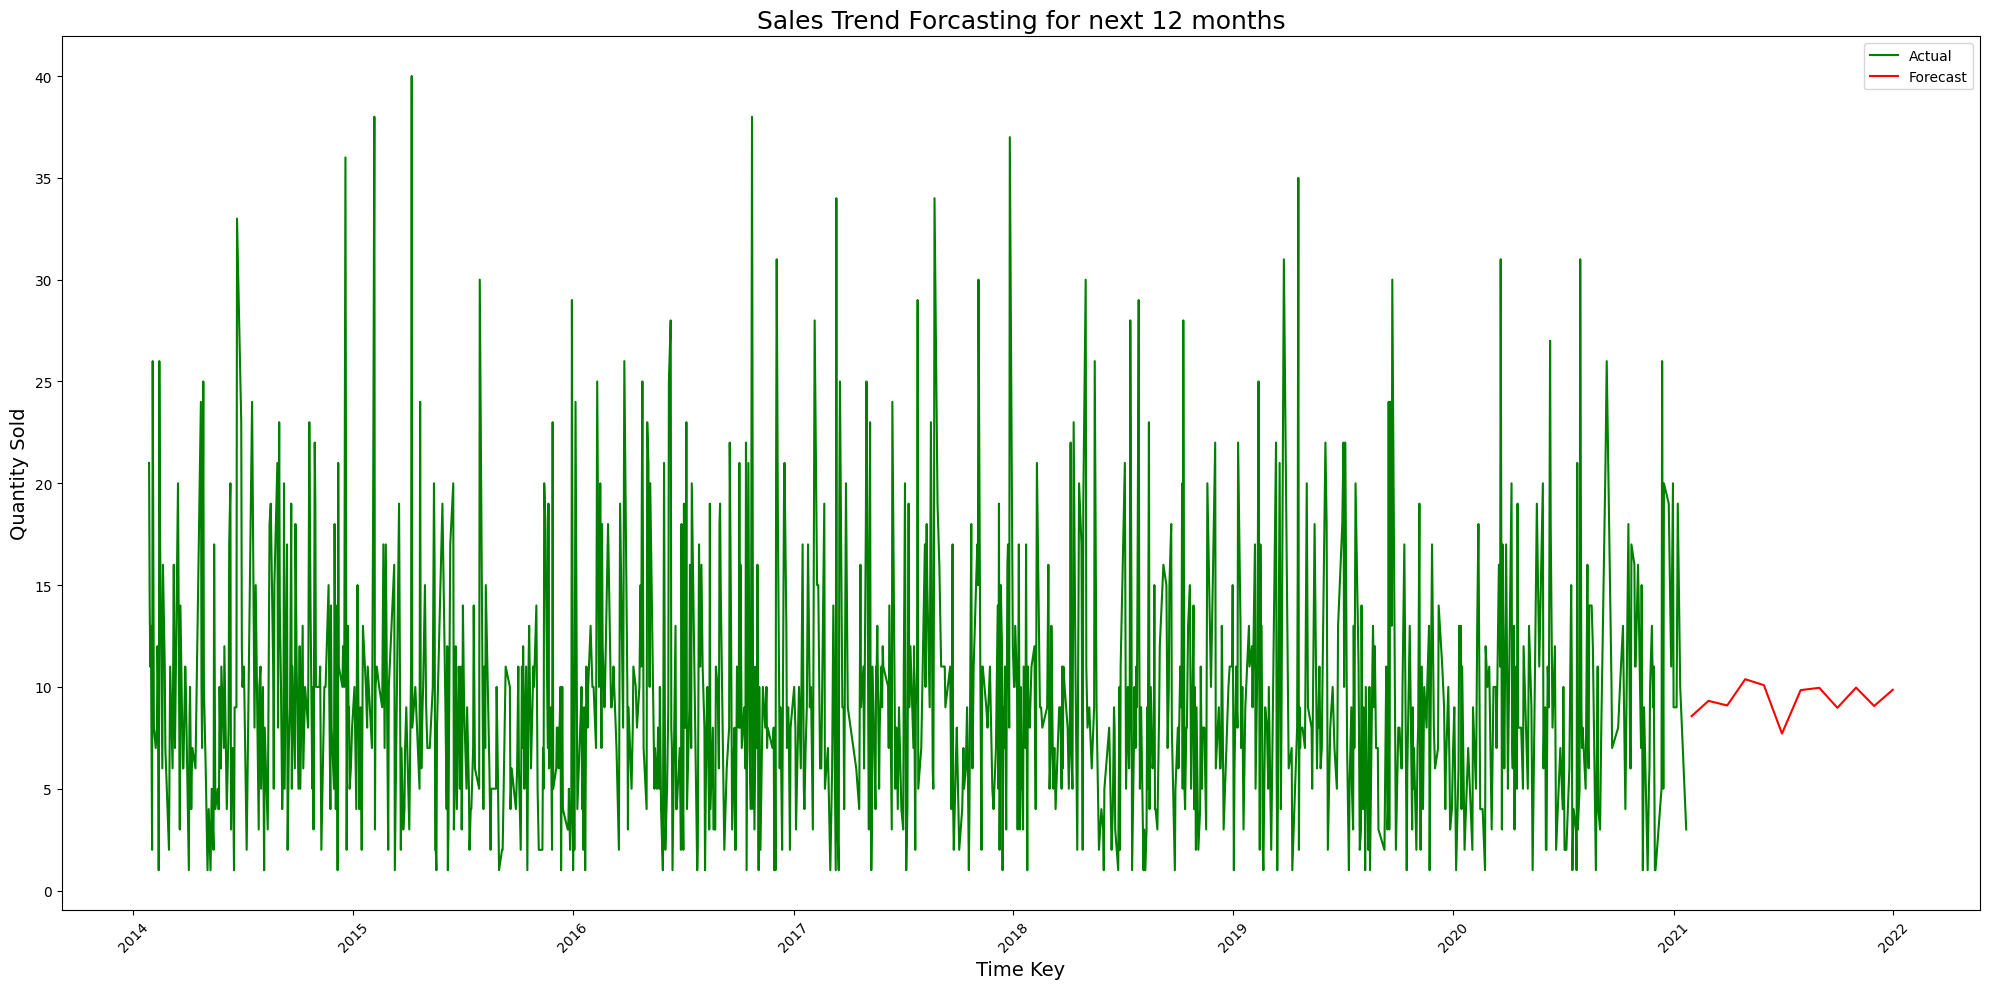

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

store_data['date'] = pd.to_datetime(store_data['date'])
store_data['date'] = store_data['date'].dt.date
store_data['date']

time_series_df = store_data.groupby('date')['quantity_sold'].sum().reset_index()
time_series_df['date'] = pd.to_datetime(time_series_df['date'])

model = ExponentialSmoothing(time_series_df['quantity_sold'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

forecast = fit.forecast(steps=12)
forecast_index = pd.date_range(start=time_series_df['date'].iloc[-1], periods=12, freq='M')

plt.figure(figsize=(20, 10))
plt.plot(time_series_df['date'], time_series_df['quantity_sold'], label='Actual', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Sales Trend Forcasting for next 12 months', fontsize = 18)
plt.xlabel('Time Key', fontsize = 14)
plt.ylabel('Quantity Sold', fontsize = 14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Revenue Trend Forecasting

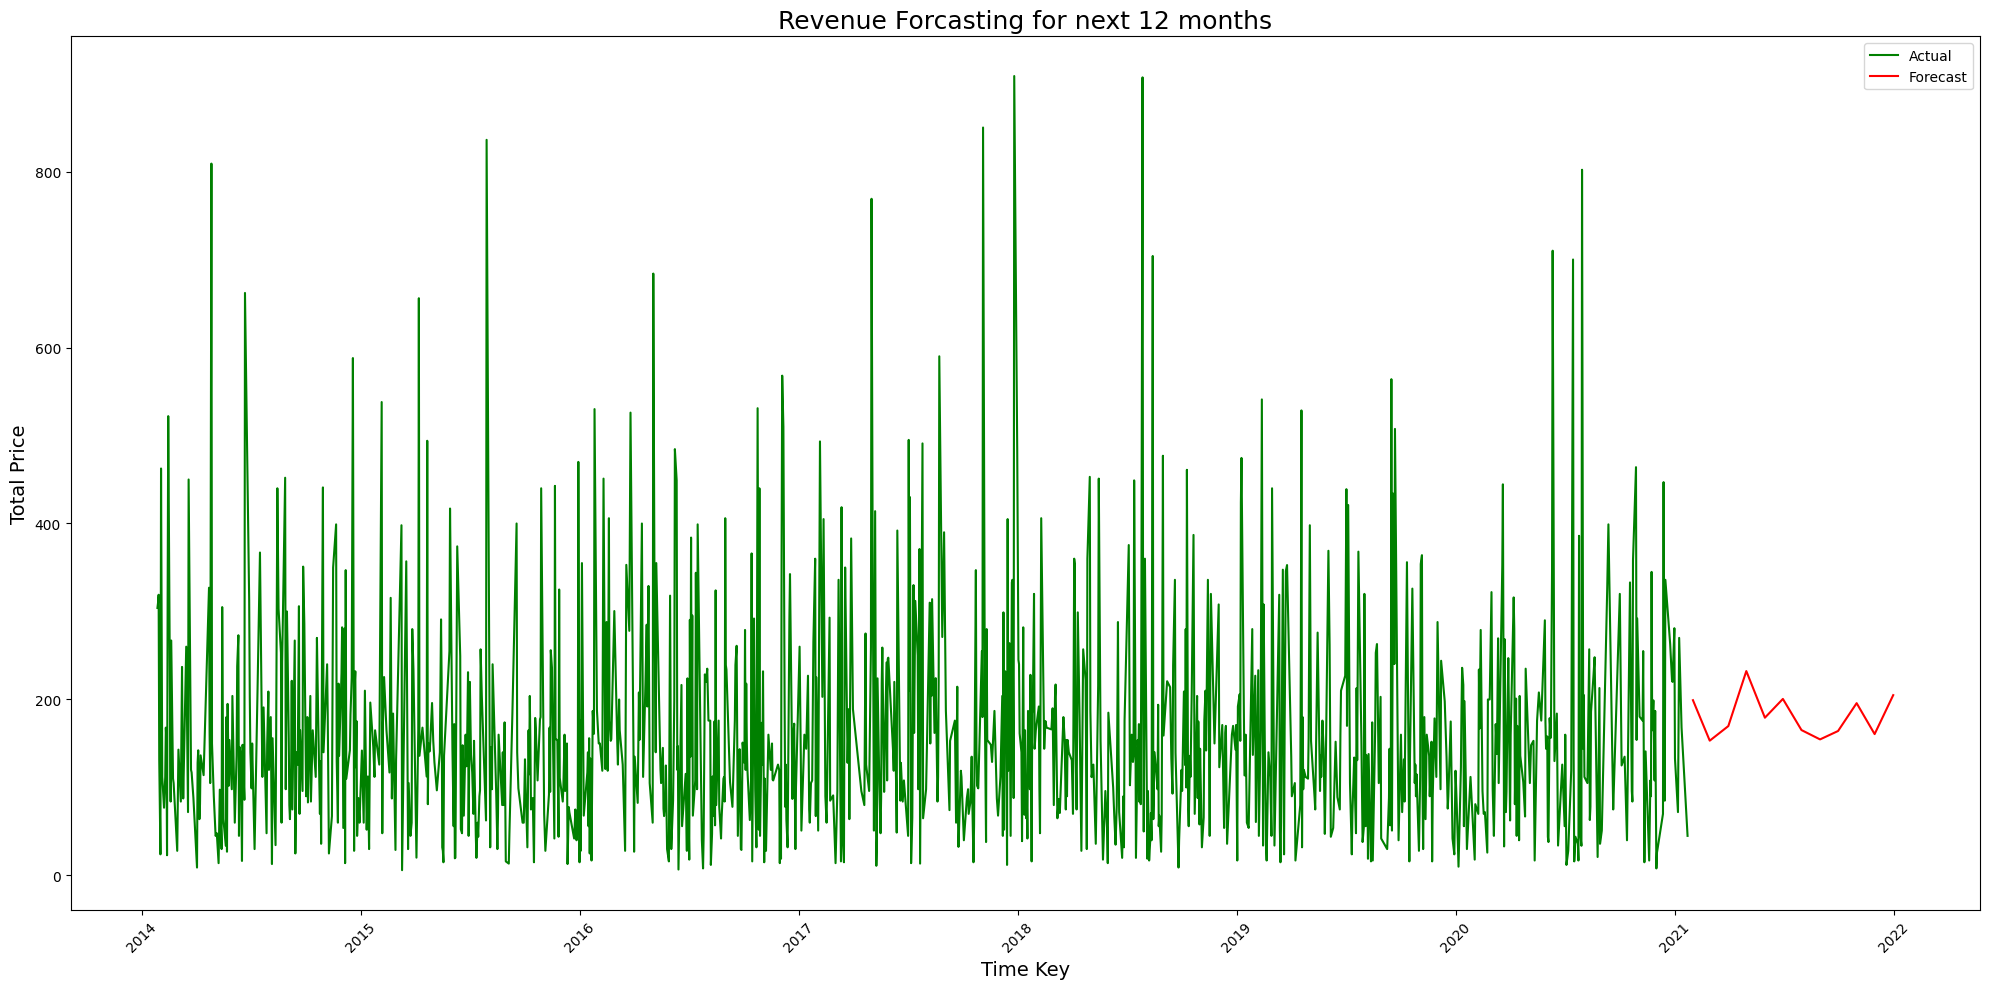

In [32]:
time_series_df = store_data.groupby('date')['total_price'].sum().reset_index()
time_series_df['date'] = pd.to_datetime(time_series_df['date'])

model = ExponentialSmoothing(time_series_df['total_price'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

forecast = fit.forecast(steps=12)
forecast_index = pd.date_range(start=time_series_df['date'].iloc[-1], periods=12, freq='M')

plt.figure(figsize=(20, 10))
plt.plot(time_series_df['date'], time_series_df['total_price'], label='Actual', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Revenue Forcasting for next 12 months', fontsize = 18)
plt.xlabel('Time Key', fontsize = 14)
plt.ylabel('Total Price', fontsize = 14)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()